# Introduction to Decision Trees
In this notebook we will

1. introduce decision trees,
2. Define Gini Impurity and
3. Review the CART algorithm used to fit a decision tree.


## What is a Decision Tree?


A **Decision Tree** is a machine learning model that makes predictions by repeatedly splitting data into subsets based on certain conditions.

- **How it works:**
  - It asks a series of questions to classify data or make predictions.
  - Each question splits the data into smaller groups (nodes) based on features and conditions.


__Key Terms__

- **Nodes** contain:
  - `feature`: The feature used for splitting (e.g., Age, Position).
  - `threshold`: The condition used to split the data.
  - **`gini`**: The Gini impurity at the node. Lower values mean purer groups.
  - **`samples`**: The number of data points at the node.
  - **`value`**: The number of data points belonging to each class at the node.
  - **`class`**: The predicted class at that node.
- **Edges** show the conditions leading to child nodes.
- **Leaf Nodes** contain the final prediction.


- **Depth:** The number of levels in the tree.


__Example__  Classifying Fruits

We will classify fruits into two categories: **Apple** and **Grape** using:
1. **Size**: Small or Large.
2. **Color**: Red or Green.


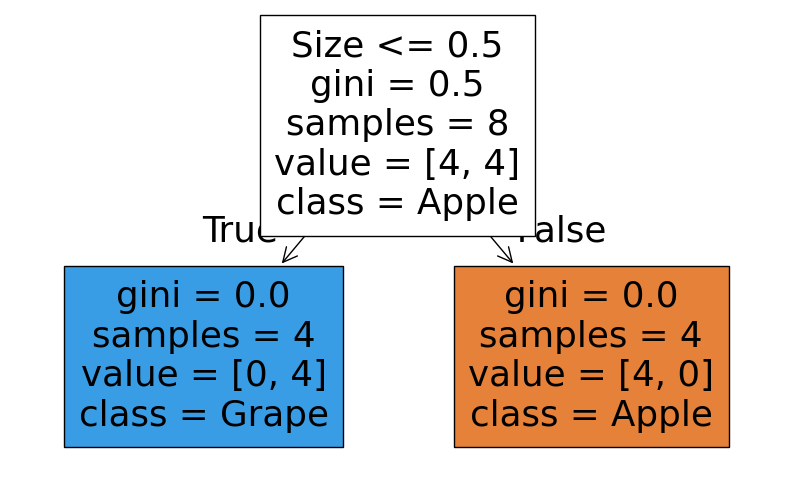

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a simple dataset
data = {
    "Size": ["Large", "Large", "Small", "Small", "Large", "Small", "Large", "Small"],
    "Color": ["Red", "Green", "Red", "Green", "Red", "Red", "Green", "Green"],
    "Label": ["Apple", "Apple", "Grape", "Grape", "Apple", "Grape", "Apple", "Grape"]
}
df = pd.DataFrame(data)

# Encode features as numerical values
df["Size"] = df["Size"].map({"Small": 0, "Large": 1})
df["Color"] = df["Color"].map({"Green": 0, "Red": 1})
df["Label"] = df["Label"].map({"Apple": 0, "Grape": 1})

# Prepare features (X) and target (y)
X = df[["Size", "Color"]]
y = df["Label"]

# Train Decision Tree
tree = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)
tree.fit(X, y)

# Visualize the tree
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=["Size", "Color"], class_names=["Apple", "Grape"], filled=True)
plt.show()


The **Gini impurity** measures how "mixed" or "uncertain" the data within a node is regarding its classification. For class  $𝑖 $ of a node, it estimates the probability that a randomly chosen sample of class  $𝑖$  from the node is incorrectly classified as not class  $𝑖$ .  

- **Formula**:  
  $$
  \text{Gini} = 1 - \sum_{i=1}^{k} p_i^2
  $$
  Where $p_i$ is the proportion of samples in class $i$.

- **Range**:
  - 0: The node is perfectly pure (all samples belong to one class).
  - 0.5: Maximum impurity (when a node is perfectly split between two classes. )

__Example: Gini Calculation__
1. A node contains 10 samples:
   - 6 belong to Class A ($p_A = 6/10 = 0.6 $).
   - 4 belong to Class B ($ p_B = 4/10 = 0.4 $).

2. Calculate Gini:
   $$
   \text{Gini} = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 0.48
   $$
3. Interpretation:  
   - Gini = 0.48 means the node is moderately impure. A pure node contains samples that all belong to the same class, while an impure node contains samples from multiple classes.

A **split** reduces the Gini impurity. For example:
- If splitting this node creates two smaller, purer nodes:
  - Node 1: 4 samples, all Class A ($ Gini = 0 $).
  - Node 2: 6 samples, 3 each of A and B ($ Gini = 0.5 $).

The **weighted average Gini** after the split is lower than before, which is why the split is made.


## Fitting a decision tree model

Fitting a decision tree model involves constructing the tree by **recursively splitting the dataset** based on features to minimize impurity at each node. Here’s a brief explanation of the process using the two-class example:

---

### **Steps to Fit the Model**

1. **Start with the Root Node**:  
   - Begin with the entire dataset in a single node.  
   - Calculate the impurity of the node (e.g., using **Gini impurity**).  

2. **Select the Best Feature and Split**:  
   - Evaluate all possible splits for each feature (e.g., size and color).  
   - For each split, calculate the weighted impurity of the resulting child nodes.  
   - Choose the feature and threshold that minimize impurity the most (maximize impurity reduction).  

3. **Create Child Nodes**:  
   - Partition the data into child nodes based on the selected split.  
   - Assign each child node the subset of data matching its criteria.  

4. **Repeat for Each Node**:  
   - For each child node:
     - Check if the node is pure or meets a stopping condition (e.g., minimum samples per leaf or maximum tree depth).  
     - If not, repeat the splitting process.  

5. **Stop Splitting**:  
   - The process stops when:
     - All nodes are pure (contain only one class), or  
     - The tree reaches its maximum depth or minimum samples per split.  

6. **Assign Class Labels**:  
   - At each terminal (leaf) node, assign a class label based on the majority class of samples in the node.  

## Decision Tree on Iris Dataset


In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Predict and Evaluate
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


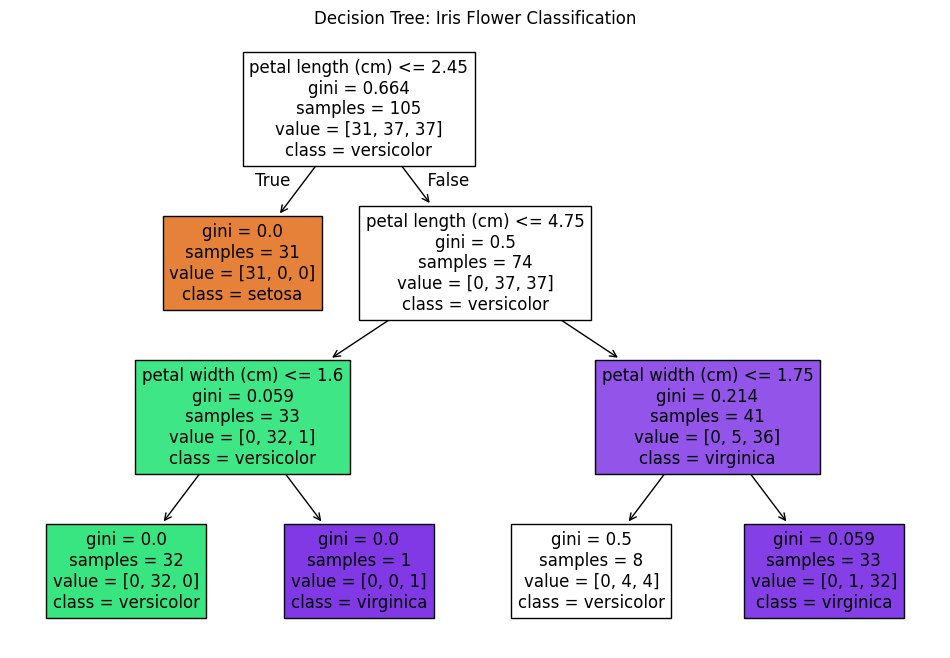

In [9]:


# Visualize the Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree: Iris Flower Classification")
plt.show()

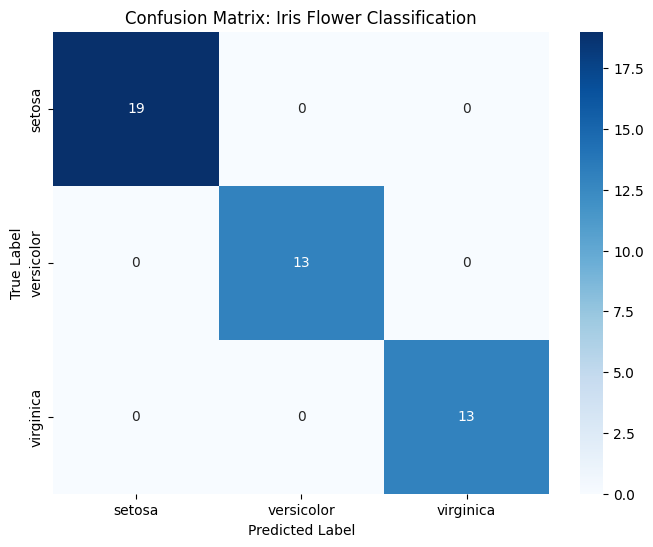

In [10]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix: Iris Flower Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Your Turn:

Apply the Decision Tree classifier to the MNIST dataset.


Experiment with the following parameters:

     - `max_depth`: Try values like 2, 3, or None.

     - `min_samples_split`: Increase from 2 to 5.
     
     - `min_samples_leaf`: Increase from 1 to 3.




In [18]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST-like Digits Dataset (from sklearn)
digits = load_digits()
X = digits.data  # Features: 8x8 pixel images, flattened to 1D arrays
y = digits.target  # Target: Labels (digits 0-9)
feature_names = [f'Pixel {i}' for i in range(X.shape[1])]
class_names = [str(i) for i in range(10)]  # Digits 0 to 9


In [ ]:

# Split Data

# Train a Decision Tree



In [19]:
# Visualize the Decision Tree


In [20]:
# Find predictions and print accuracy

In [21]:
# Confusion Matrix

# Plot Confusion Matrix
